<a href="https://colab.research.google.com/github/saipriya-raparthi/UnplatformsProject/blob/main/Genre_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model to recognise genre of a musical file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing packages

import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import keras
from keras import layers
import keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Importing the musical files from the dataset

In [ ]:
MUSIC = r'/content/drive/MyDrive/dataset-genre'
music_dataset = []
genre_target = []

for i in os.listdir(MUSIC):
    for j in os.listdir(MUSIC + "//" + i):
        if i == 'Blues':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050]) # append adds the data to the array in the next colunm
                    genre_target.append(0)
        elif i == 'Classical':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(1)
        elif i == 'Country':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(2)            
        elif i == 'Disco':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(3)
        elif i == 'Hiphop':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(4)   
        elif i == 'Jazz':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(5)
        elif i == 'Metal':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(6)         
        elif i == 'Pop':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(7)              
        elif i == 'Reggae':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(8)     
        elif i == 'Rock':
            y,_ = librosa.load(MUSIC + "//" + i + "//" + j)
            length = len(y)
            for j in range(6):
                if (j+1)*5*22050<=length:
                    music_dataset.append(y[j*5*22050:(j+1)*5*22050])
                    genre_target.append(9)

In [ ]:
total_no = len(music_dataset)
print(total_no)

3651


# Finding features from the musical files

In [ ]:
zcr = np.zeros(total_no)
centroid = np.zeros(total_no)
rolloff = np.zeros(total_no)
bandwidth=np.zeros(total_no)

mfcc = np.zeros((total_no,20,216))

for i in range(total_no):
    zcr[i] = np.mean(librosa.feature.zero_crossing_rate(music_dataset[i])[0])
    centroid[i] = np.mean(librosa.feature.spectral_centroid(y=music_dataset[i], sr=22050)[0])
    rolloff[i] = np.mean(librosa.feature.spectral_rolloff(y=music_dataset[i], sr=22050)[0])
    bandwidth[i]=np.mean(librosa.feature.spectral_bandwidth(y=music_dataset[i], sr=22050)[0])
    mfcc[i] = librosa.power_to_db(librosa.feature.mfcc(y=music_dataset[i], sr=22050), ref=np.max)

In [ ]:
zcr_min = np.amin(zcr)
zcr_max = np.amax(zcr)
centroid_min = np.amin(centroid)
centroid_max = np.amax(centroid)
rolloff_min = np.amin(rolloff)
rolloff_max = np.amax(rolloff)
bandwidth_min=np.amin(bandwidth)
bandwidth_max=np.amax(bandwidth)

In [ ]:
#Normalization
numeric_features = np.zeros((total_no,4))
numeric_features[:,0] = (zcr-zcr_min)/(zcr_max-zcr_min)
numeric_features[:,1] = (centroid-centroid_min)/(centroid_max-centroid_min)
numeric_features[:,2] = (rolloff-rolloff_min)/(rolloff_max-rolloff_min)
numeric_features[:,3] = (bandwidth-bandwidth_min)/(bandwidth_max-bandwidth_min)

In [ ]:
print(np.shape(mfcc))
print(np.shape(numeric_features))

(3651, 20, 216)
(3651, 4)


# Pre-Processing the dataset

In [ ]:
#Shuffling the dataset
import random
X_numeric = np.zeros(np.shape(numeric_features))
X_mfcc = np.zeros((3651,20,216,1))
Y = np.zeros(len(genre_target))

shuffle_index = [i for i in range(total_no)]
random.shuffle(shuffle_index)
for i in range(total_no):
    X_numeric[i] = numeric_features[shuffle_index[i]]
    X_mfcc[i,:,:,0] = mfcc[shuffle_index[i]]
    Y[i] = genre_target[shuffle_index[i]]

In [ ]:
#splitting the dataset to train and test set
X_train_numeric = X_numeric[:2920]
X_train_mfcc = X_mfcc[:2920]
Y_train = Y[:2920]

X_test_numeric = X_numeric[2920:]
X_test_mfcc = X_mfcc[2920:]
Y_test = Y[2920:]

# Feeding it to the Neural Network

In [ ]:
numeric = keras.Input(shape=(4,))
image= keras.Input(shape=(20,216,1))

x = layers.Dense(16, activation="relu")(numeric)
x = layers.Dense(8, activation="relu")(x)
x = keras.Model(inputs=numeric, outputs=x)



y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(image)
y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)
 
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)
 
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)



y = layers.Flatten()(y)
y = keras.Model(inputs=image, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(1024, activation="relu")(combined)

z = layers.Dense(256, activation="relu")(z)

z = layers.Dense(11, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fitting our neural network
model.fit([X_train_numeric,X_train_mfcc],Y_train,epochs=25,batch_size=512)

Epoch 1/25
6/6 [==============================] - 93s 15s/step - loss: 2.4131 - accuracy: 0.1041
Epoch 2/25
6/6 [==============================] - 89s 15s/step - loss: 2.2449 - accuracy: 0.1860
Epoch 3/25
6/6 [==============================] - 88s 15s/step - loss: 2.1302 - accuracy: 0.2469
Epoch 4/25
6/6 [==============================] - 88s 15s/step - loss: 1.9658 - accuracy: 0.2979
Epoch 5/25
6/6 [==============================] - 88s 15s/step - loss: 1.8181 - accuracy: 0.3363
Epoch 6/25
6/6 [==============================] - 89s 15s/step - loss: 1.7513 - accuracy: 0.3846
Epoch 7/25
6/6 [==============================] - 89s 15s/step - loss: 1.6476 - accuracy: 0.4137
Epoch 8/25
6/6 [==============================] - 88s 15s/step - loss: 1.5591 - accuracy: 0.4401
Epoch 9/25
6/6 [==============================] - 88s 15s/step - loss: 1.4807 - accuracy: 0.4647
Epoch 10/25
6/6 [==============================] - 88s 15s/step - loss: 1.4308 - accuracy: 0.4836
Epoch 11/25
6/6 [============

In [ ]:
test_loss, test_acc = model.evaluate([X_test_numeric,X_test_mfcc],Y_test)
print(test_acc)

23/23 [==============================] - 6s 255ms/step - loss: 1.3581 - accuracy: 0.5431
0.5430916547775269


# The following is to check prediction for a custom input:

In [ ]:
def probability(y):
    
    test_dataset = []
    length = len(y)
    for j in range(1000):
        if (j+1)*5*22050<=length:
            test_dataset.append(y[j*5*22050:(j+1)*5*22050]/np.amax(np.abs(y[j*5*22050:(j+1)*5*22050])))
    total_no_test = len(test_dataset)
    
    zcr_test = np.zeros(total_no_test)
    centroid_test = np.zeros(total_no_test)
    rolloff_test = np.zeros(total_no_test)
    mfcc_test = np.zeros((total_no_test,20,216,1))

    for i in range(total_no_test):
        zcr_test[i] = np.mean(librosa.feature.zero_crossing_rate(test_dataset[i])[0])
        centroid_test[i] = np.mean(librosa.feature.spectral_centroid(y=test_dataset[i], sr=22050)[0])
        rolloff_test[i] = np.mean(librosa.feature.spectral_rolloff(y=test_dataset[i], sr=22050)[0])
        mfcc_test[i,:,:,0] = librosa.power_to_db(librosa.feature.mfcc(y=test_dataset[i], sr=22050), ref=np.max)
        
    numeric_features_test = np.zeros((total_no_test,4))
    numeric_features_test[:,0] = (zcr_test-zcr_min)/(zcr_max-zcr_min)
    numeric_features_test[:,1] = (centroid_test-centroid_min)/(centroid_max-centroid_min)
    numeric_features_test[:,2] = (rolloff_test-rolloff_min)/(rolloff_max-rolloff_min)
    numeric_features[:,3] = (bandwidth-bandwidth_min)/(bandwidth_max-bandwidth_min)
    
    return (model.predict([numeric_features_test,mfcc_test]))

# Genre Recognition Example

The song is probably Reggae.


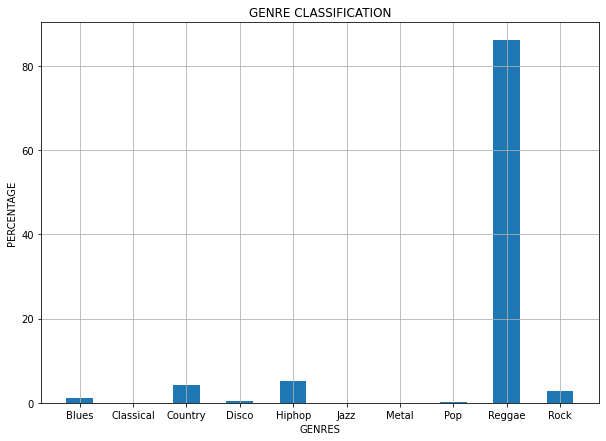

In [ ]:
path=r'/content/drive/MyDrive/dataset-genre/Reggae/reggae.00002.wav'
y,sr = librosa.load(path, sr = 22050)
prob = probability(y)
x=np.array(['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])
row = np.shape(prob)
rows=row[0]
column_sums=(prob.sum(axis=0))/rows
max_1=np.argmax(column_sums)
print("The song is probably " + str(x[max_1]) + ".")
plt.figure(figsize=(10,7))
plt.bar(x[0:10],column_sums[0:10]*100,width=0.5)
plt.title('GENRE CLASSIFICATION')
plt.xlabel('GENRES')
plt.ylabel('PERCENTAGE')
plt.grid()
plt.show()